# TP1 BigData NS
### Apprentissage supervisé avec Python
### Julian DEGUT

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## I / Apprentissage supervisé : Feature engineering et Classification
#### 1. Importer les données

In [2]:
df = pd.read_csv('../data/credit_scoring.csv', sep=';')

data = df.values

x = data[:,0:len(data[0])-1]
y = data[:,len(data[0])-1]

print("x shape :", x.shape)
print("y shape :", y.shape)

print("Pourcentage de positif dans y :", np.sum(y)/len(y)*100, "%")
print("Poucentage de négatif dans y :", (len(y)-np.sum(y))/len(y)*100, "%")

x shape : (4375, 13)
y shape : (4375,)
Pourcentage de positif dans y : 72.20571428571428 %
Poucentage de négatif dans y : 27.794285714285717 %


Séparation des données en x_train, x_test, y_train, y_test :

In [3]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=RANDOM_STATE)

print("x_train shape :", x_train.shape)
print("x_test shape :", x_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

x_train shape : (2187, 13)
x_test shape : (2188, 13)
y_train shape : (2187,)
y_test shape : (2188,)


#### 2. Apprentissage et évaluation de modèles

On comparera les critères d'accuracy et de précision car dans notre cas, on veut minimiser les faux positifs (on ne veut pas accorder un crédit à quelqu'un qui ne le remboursera pas).

In [4]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

def get_accuracy_precision_on_nn(x1, x2, y1, y2, nn_type):
    """
    Get accuracy and precision on a neural network.
    :param x1: x_train
    :param x2: x_test
    :param y1: y_train
    :param y2: y_test
    :param nn_type: "CART", "KNN" or "MLP" 
    :return: accuracy and precision
    """
    if nn_type == "CART":
        nn = DecisionTreeClassifier(random_state=RANDOM_STATE)
    elif nn_type == "KNN":
        nn = KNeighborsClassifier()
    elif nn_type == "MLP":
        nn = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=RANDOM_STATE)
    else:
        print("Type de modèle non reconnu")
        return
    
    nn.fit(x1, y1)
    nn_accuracy = accuracy_score(y2, nn.predict(x2))
    nn_precision = precision_score(y2, nn.predict(x2))
    return nn_accuracy, nn_precision

In [5]:
# Arbre CART
tree_accuracy, tree_precision = get_accuracy_precision_on_nn(x_train, x_test, y_train, y_test, "CART")

print("------------- Arbre CART -------------")
print("Score sur le test :", tree_accuracy)
print("Score précision sur le test:", tree_precision)
print("--------------------------------------")

# K-plus proches voisins
knn_accuracy, knn_precision = get_accuracy_precision_on_nn(x_train, x_test, y_train, y_test, "KNN")

print("------------- K-plus proches voisins -------------")
print("Score sur le test :", knn_accuracy)
print("Score précision sur le test:", knn_precision)
print("--------------------------------------------------")

# Multi-layer Perceptron
mlp_accuracy, mlp_precision = get_accuracy_precision_on_nn(x_train, x_test, y_train, y_test, "MLP")

print("------------- Multi-layer Perceptron -------------")
print("Score sur le test :", mlp_accuracy)
print("Score précision sur le test:", mlp_precision)
print("--------------------------------------------------")

------------- Arbre CART -------------
Score sur le test : 0.7271480804387569
Score précision sur le test: 0.8194174757281554
--------------------------------------
------------- K-plus proches voisins -------------
Score sur le test : 0.7248628884826326
Score précision sur le test: 0.7709713024282561
--------------------------------------------------
------------- Multi-layer Perceptron -------------
Score sur le test : 0.7353747714808044
Score précision sur le test: 0.7442877977637335
--------------------------------------------------


#### 3. Normalisation des variables continues

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalisation des données

scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Arbre CART
tree_accuracy_norm, tree_precision_norm = get_accuracy_precision_on_nn(x_train_scaled, x_test_scaled, y_train, y_test, "CART")

print("------------- Arbre CART -------------")
print("Score sur le test (non normalisées) :", tree_accuracy)
print("Score sur le test (normalisées) :", tree_accuracy_norm)
print("Score précision sur le test (non normalisées) :", tree_precision)
print("Score précision sur le test (normalisées) :", tree_precision_norm)
print("--------------------------------------")

# K-plus proches voisins
knn_accuracy_norm, knn_precision_norm = get_accuracy_precision_on_nn(x_train_scaled, x_test_scaled, y_train, y_test, "KNN")

print("------------- K-plus proches voisins -------------")
print("Score sur le test (non normalisées) :", knn_accuracy)
print("Score sur le test (normalisées) :", knn_accuracy_norm)
print("Score précision sur le test (non normalisées) :", knn_precision)
print("Score précision sur le test (normalisées) :", knn_precision_norm)
print("--------------------------------------------------")

# Multi-layer Perceptron
mlp_accuracy_norm, mlp_precision_norm = get_accuracy_precision_on_nn(x_train_scaled, x_test_scaled, y_train, y_test, "MLP")

print("------------- Multi-layer Perceptron -------------")
print("Score sur le test (non normalisées) :", mlp_accuracy)
print("Score sur le test (normalisées) :", mlp_accuracy_norm)
print("Score précision sur le test (non normalisées) :", mlp_precision)
print("Score précision sur le test (normalisées) :", mlp_precision_norm)
print("--------------------------------------------------")

------------- Arbre CART -------------
Score sur le test (non normalisées) : 0.7271480804387569
Score sur le test (normalisées) : 0.7271480804387569
Score précision sur le test (non normalisées) : 0.8194174757281554
Score précision sur le test (normalisées) : 0.8181818181818182
--------------------------------------
------------- K-plus proches voisins -------------
Score sur le test (non normalisées) : 0.7248628884826326
Score sur le test (normalisées) : 0.7527422303473492
Score précision sur le test (non normalisées) : 0.7709713024282561
Score précision sur le test (normalisées) : 0.8106015485407981
--------------------------------------------------
------------- Multi-layer Perceptron -------------
Score sur le test (non normalisées) : 0.7353747714808044
Score sur le test (normalisées) : 0.776508226691042
Score précision sur le test (non normalisées) : 0.7442877977637335
Score précision sur le test (normalisées) : 0.8381717109326745
--------------------------------------------------

#### 4. Création de nouvelles variables (PCA)

In [7]:
# PCA sur les données non normalisées, on garde les 3 premières dimensions et on les ajoute aux données normalisées
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(x_train_scaled)
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

x_train_scaled_pca = np.concatenate((x_train_scaled, x_train_pca), axis=1)
x_test_scaled_pca = np.concatenate((x_test_scaled, x_test_pca), axis=1)

# Arbre CART
tree_accuracy_pca, tree_precision_pca = get_accuracy_precision_on_nn(x_train_scaled_pca, x_test_scaled_pca, y_train, y_test, "CART")

print("------------- Arbre CART -------------")
print("Score sur le test (non normalisées) :", tree_accuracy)
print("Score sur le test (normalisées) :", tree_accuracy_norm)
print("Score sur le test (PCA norm) :", tree_accuracy_pca, "\n")
print("Score précision sur le test (non normalisées) :", tree_precision)
print("Score précision sur le test (normalisées) :", tree_precision_norm)
print("Score précision sur le test (PCA norm) :", tree_precision_pca)
print("--------------------------------------")

# K-plus proches voisins
knn_accuracy_pca, knn_precision_pca = get_accuracy_precision_on_nn(x_train_scaled_pca, x_test_scaled_pca, y_train, y_test, "KNN")

print("------------- K-plus proches voisins -------------")
print("Score sur le test (non normalisées) :", knn_accuracy)
print("Score sur le test (normalisées) :", knn_accuracy_norm)
print("Score sur le test (PCA norm) :", knn_accuracy_pca, "\n")
print("Score précision sur le test (non normalisées) :", knn_precision)
print("Score précision sur le test (normalisées) :", knn_precision_norm)
print("Score précision sur le test (PCA norm) :", knn_precision_pca)
print("--------------------------------------------------")

# Multi-layer Perceptron
mlp_accuracy_pca, mlp_precision_pca = get_accuracy_precision_on_nn(x_train_scaled_pca, x_test_scaled_pca, y_train, y_test, "MLP")

print("------------- Multi-layer Perceptron -------------")
print("Score sur le test (non normalisées) :", mlp_accuracy)
print("Score sur le test (normalisées) :", mlp_accuracy_norm)
print("Score sur le test (PCA norm) :", mlp_accuracy_pca, "\n")
print("Score précision sur le test (non normalisées) :", mlp_precision)
print("Score précision sur le test (normalisées) :", mlp_precision_norm)
print("Score précision sur le test (PCA norm) :", mlp_precision_pca)
print("--------------------------------------------------")

------------- Arbre CART -------------
Score sur le test (non normalisées) : 0.7271480804387569
Score sur le test (normalisées) : 0.7271480804387569
Score sur le test (PCA norm) : 0.7362888482632541 

Score précision sur le test (non normalisées) : 0.8194174757281554
Score précision sur le test (normalisées) : 0.8181818181818182
Score précision sur le test (PCA norm) : 0.8327825512227363
--------------------------------------
------------- K-plus proches voisins -------------
Score sur le test (non normalisées) : 0.7248628884826326
Score sur le test (normalisées) : 0.7527422303473492
Score sur le test (PCA norm) : 0.756398537477148 

Score précision sur le test (non normalisées) : 0.7709713024282561
Score précision sur le test (normalisées) : 0.8106015485407981
Score précision sur le test (PCA norm) : 0.8103957471943296
--------------------------------------------------
------------- Multi-layer Perceptron -------------
Score sur le test (non normalisées) : 0.7353747714808044
Score sur

| --- | --- | --- | --- |
| **Modèle** | **Données** | **Accuracy** | **Precision** |
| CART | Non normalisées | 0.727 | **0.819** |
| KNN | Non normalisées | 0.725 | 0.771 |
| MLP | Non normalisées | **0.735** | 0.744 |
| --- | --- | --- | --- |
| CART | Normalisées | 0.727 | 0.818 |
| KNN | Normalisées | 0.753 | 0.811 |
| MLP | Normalisées | **0.777** | **0.838** |
| --- | --- | --- | --- |
| CART | PCA norm | 0.736 | **0.833** |
| KNN | PCA norm | 0.756 | 0.81 |
| MLP | PCA norm | **0.77** | 0.827 |

Pour la suite du TP, on prendra donc la configuration possédant la meilleure alliance accuracy/precision, à savoir le **MLP avec les données normalisées**.

#### 5. Sélection de variables

Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


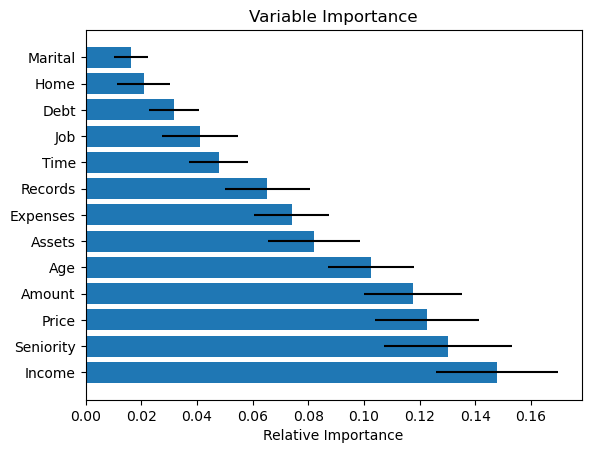

In [8]:
from sklearn.ensemble import RandomForestClassifier

# On sélectionne les données normalisées
x_train = x_train_scaled
x_test = x_test_scaled

# On définit notre modèle
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(x_train, y_train)

# On récupère les features importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = df.columns[0:len(df.columns)-1]
print(features[sorted_idx])

# On affiche l'histogramme
padding = np.arange(x_train.size/len(y_train)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

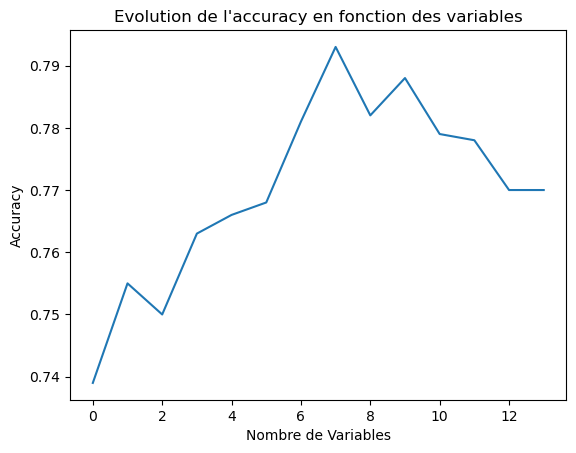

In [9]:
model = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=RANDOM_STATE)
scores = np.zeros(x_train.shape[1]+1)

for f in np.arange(0, x_train.shape[1]+1):
    X1_f = x_train[:,sorted_idx[:f+1]]
    X2_f = x_test[:,sorted_idx[:f+1]]
    model.fit(X1_f,y_train)
    y_model = model.predict(X2_f)
    scores[f]=np.round(accuracy_score(y_test, y_model),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

#### 6. Paramétrage des classifieurs

In [10]:
# GridSearchCV pour tuner les paramètres du MLP pour maximiser le critère : (accuracy+precision)/2
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Sélection des 8 premières variables (0,1,...,7)
x_train_f = x_train[:,sorted_idx[:8]]
x_test_f = x_test[:,sorted_idx[:8]]

def criterion(y_true, y_pred):
    return (accuracy_score(y_true, y_pred)+precision_score(y_true, y_pred))/2

score = make_scorer(criterion, greater_is_better=True)

parameters = {'hidden_layer_sizes':[(40, 20), (30, 10), (40), (20)], 
              'activation':['identity', 'logistic', 'tanh', 'relu'], 
              'alpha':[0.0001, 0.001, 0.01, 0.1], 
              'learning_rate':['constant', 'invscaling', 'adaptive']}

clf = GridSearchCV(MLPClassifier(random_state=RANDOM_STATE), parameters, cv=5, scoring=score, n_jobs=-1)
clf.fit(x_train_f, y_train)

accuracy = accuracy_score(y_test, clf.predict(x_test_f))
precision = precision_score(y_test, clf.predict(x_test_f))

print("Meilleurs paramètres trouvés :")
print(clf.best_params_)
print("Score sur le test :", accuracy)
print("Score précision sur le test :", precision)


KeyboardInterrupt



Meilleurs paramètres :
- activation : sigmoid (softmax)
- alpha : 0.001
- couche cachées : (40, 20)
- taux d'apprentissage : constant

Accuracy : 0.795
Precision : 0.825
Score total selon le critère : 0.81

#### 7. Création d'une pipeline

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
import pickle

pipeline = Pipeline([
    ('clf', SelectFromModel(RandomForestClassifier(n_estimators=1000, random_state=RANDOM_STATE), max_features=8)),
    ('scaler', StandardScaler()),
    ('mlp2', MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(40, 20), learning_rate='constant', random_state=RANDOM_STATE))
])

pipeline.fit(x, y)

accuracy = accuracy_score(y, pipeline.predict(x))
precision = precision_score(y, pipeline.predict(x))

print("Score sur le test :", accuracy)
print("Score précision sur le test :", precision)

# Sauvegarde du pipeline
with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Utilisation du pipeline
with open('pipeline.pkl', 'rb') as f:
    pipeline = pickle.load(f)
    preds_proba = pipeline.predict_proba(x)
    preds = pipeline.predict(x)
    print("After loading ")
    print(accuracy_score(y, preds))

#### 8. Comparaison de plusieurs algorithmes d'apprentissage

In [ ]:
from sklearn.model_selection import KFold, cross_validate


def run_classifiers(x, y, clfs):
    """
    Run classifiers on the given data.
    :param x: inputs
    :param y: targets
    :param clfs: classifiers (dictionary)
    :return: 
    """
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    for clf_name, clf in clfs.items():
        cv_validate = cross_validate(clf, x, y, cv=kf, scoring=['accuracy', 'roc_auc', 'precision'])
        print(f"Classifier: {clf_name}")
        print(f"Accuracy: {np.mean(cv_validate['test_accuracy']):.3f} +/- {np.std(cv_validate['test_accuracy']):.3f}")
        print(f"AUC: {np.mean(cv_validate['test_roc_auc']):.3f} +/- {np.std(cv_validate['test_roc_auc']):.3f}")
        print(f"Precision: {np.mean(cv_validate['test_precision']):.3f} +/- {np.std(cv_validate['test_precision']):.3f}")
        print(f"Custom scoring : {(np.mean(cv_validate['test_accuracy'] + cv_validate['test_precision']))/2:.3f} +/- {(np.std(cv_validate['test_accuracy'] + cv_validate['test_precision']))/2:.3f}")
        print(f"Learning time (fit): {np.mean(cv_validate['fit_time']):.3f} secondes")
        print("\n")

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

parameters = {
    'n_estimators': 200,
    'n_neigbors': 10,
    'hidden_layer_sizes': (20, 10),
}

clfs = {
    'NaiveBayesSimple': GaussianNB(),
    'CART': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'ID3': DecisionTreeClassifier(criterion='entropy', random_state=RANDOM_STATE),
    'STUMP': DecisionTreeClassifier(max_depth=1, random_state=RANDOM_STATE),
    'mlp': MLPClassifier(hidden_layer_sizes=parameters['hidden_layer_sizes'], random_state=RANDOM_STATE),
    'KNN': KNeighborsClassifier(n_neighbors=parameters['n_neigbors'], n_jobs=-1),
    'Bagging': BaggingClassifier(n_estimators=parameters['n_estimators'], random_state=RANDOM_STATE, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(n_estimators=parameters['n_estimators'], random_state=RANDOM_STATE),
    'RF': RandomForestClassifier(n_estimators=parameters['n_estimators'], random_state=RANDOM_STATE, n_jobs=-1),
    'XGBoost': XGBClassifier(n_estimators=parameters['n_estimators'], random_state=RANDOM_STATE)
}

# Non normalisées
# run_classifiers(x, y, clfs)

# Normalisées
run_classifiers(x_train, y_train, clfs)

Avec les données non normalisées :

|---|---|---|---|---|
| **Classifier** | **Accuracy** | **AUC** | **Precision** | **Custom score** | **Fitting time** | **Parameters** |
| NaiveBayesSimple | 0.772 | 0.791 | 0.828 | 0.800 | 0.002 | - |
| CART | 0.727 | 0.656 | 0.808 | 0.767 | 0.020 | - |
| ID3 | 0.723 | 0.664 | 0.814 | 0.769 | 0.017 | - |
| STUMP | 0.722 | 0.618 | 0.740 | 0.731 | 0.002 | - |
| MLP | 0.681 | 0.689 | 0.801 | 0.741 | 0.392 | hidden_layer_sizes=(20, 10) |
| KNN | 0.732 | 0.680 | 0.778 | 0.755 | 0.008 | n_neighbors=10 |
| Bagging | 0.782 | 0.823 | 0.825 | 0.804 | 0.789 | n_estimators=200 |
| AdaBoost | 0.790 | 0.822 | 0.825 | **0.807** | 0.596 | n_estimators=200 |
| RF | 0.786 | 0.829 | 0.818 | 0.802 | 0.966 | n_estimators=200 |
| XGBoost | 0.765 | 0.805 | 0.820 | 0.793 | 0.141 | n_estimators=200 |

Meilleur algo : AdaBoost avec un custom score de 0.807

Avec les données normalisées :

|---|---|---|---|---|
| **Classifier** | **Accuracy** | **AUC** | **Precision** | **Custom score** | **Fitting time** | **Parameters** |
| NaiveBayesSimple | 0.757 | 0.783 | 0.815 | 0.786 | 0.005 | - |
| CART | 0.709 | 0.641 | 0.799 | 0.754 | 0.010 | - |
| ID3 | 0.704 | 0.629 | 0.791 | 0.748 | 0.010 | - |
| STUMP | 0.721 | 0.617 | 0.736 | 0.728 | 0.003 | - |
| MLP | 0.792 | 0.838 | 0.836 | **0.814** | 0.626 | hidden_layer_sizes=(20, 10) |
| KNN | 0.754 | 0.778 | 0.811 | 0.783 | 0.002 | n_neighbors=10 |
| Bagging | 0.760 | 0.800 | 0.809 | 0.784 | 0.342 | n_estimators=200 |
| AdaBoost | 0.770 | 0.807 | 0.815 | 0.793 | 0.432 | n_estimators=200 |
| RF | 0.770 | 0.817 | 0.807 | 0.788 | 0.620 | n_estimators=200 |
| XGBoost | 0.761 | 0.793 | 0.812 | 0.787 | 0.124 | n_estimators=200 |

Meilleur algo : MLP avec un custom score de 0.814


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
import pickle

pipeline_final = Pipeline([
    ('clf', SelectFromModel(RandomForestClassifier(n_estimators=1000, random_state=RANDOM_STATE), max_features=8)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(40, 20), random_state=RANDOM_STATE))
])

pipeline_final.fit(x, y)

accuracy = accuracy_score(y, pipeline_final.predict(x))
precision = precision_score(y, pipeline_final.predict(x))

print(accuracy, precision)

with open('../artifacts/model.pickle', 'wb') as f:
    pickle.dump(pipeline_final, f)

0.7936 0.8202725724020443


In [19]:
custom = (accuracy + precision) / 2
print(custom)

0.7922814639905549
